In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Этот кусок украден отсюда "https://tproger.ru/translations/python-data-vizualization/"
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [2]:
df = pd.read_csv('df_after_step3.csv', index_col = 0)
df

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,workday,first_workday,second_workday
09.10.2008,26.1629,767.98,11.0,1.40,637.93,700.37,100.91,100.867301,workday,0,0
10.10.2008,26.0695,743.23,11.0,1.40,0.00,700.37,100.91,100.867301,workday,0,0
13.10.2008,26.0695,743.23,11.0,1.40,700.37,666.37,100.91,100.867301,workday,1,0
14.10.2008,26.1111,726.16,11.0,1.40,666.81,755.22,100.91,100.867301,workday,0,1
15.10.2008,26.0871,712.49,11.0,1.40,755.22,689.71,100.91,100.867301,workday,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22.02.2023,74.8596,4442.45,7.5,4.65,2215.43,2212.40,100.46,99.631358,workday,0,0
24.02.2023,74.8596,4442.45,7.5,4.65,2209.10,2208.03,100.46,99.631358,day off,0,0
27.02.2023,74.8596,4442.45,7.5,4.65,2194.39,2241.10,100.46,99.631358,workday,1,0
28.02.2023,75.4323,4391.92,7.5,4.65,2246.26,2253.16,100.46,99.631358,workday,0,1


### Подгрузив таблицу, можно сразу посмотреть на все возможные связи между нашими переменными и их распределение.

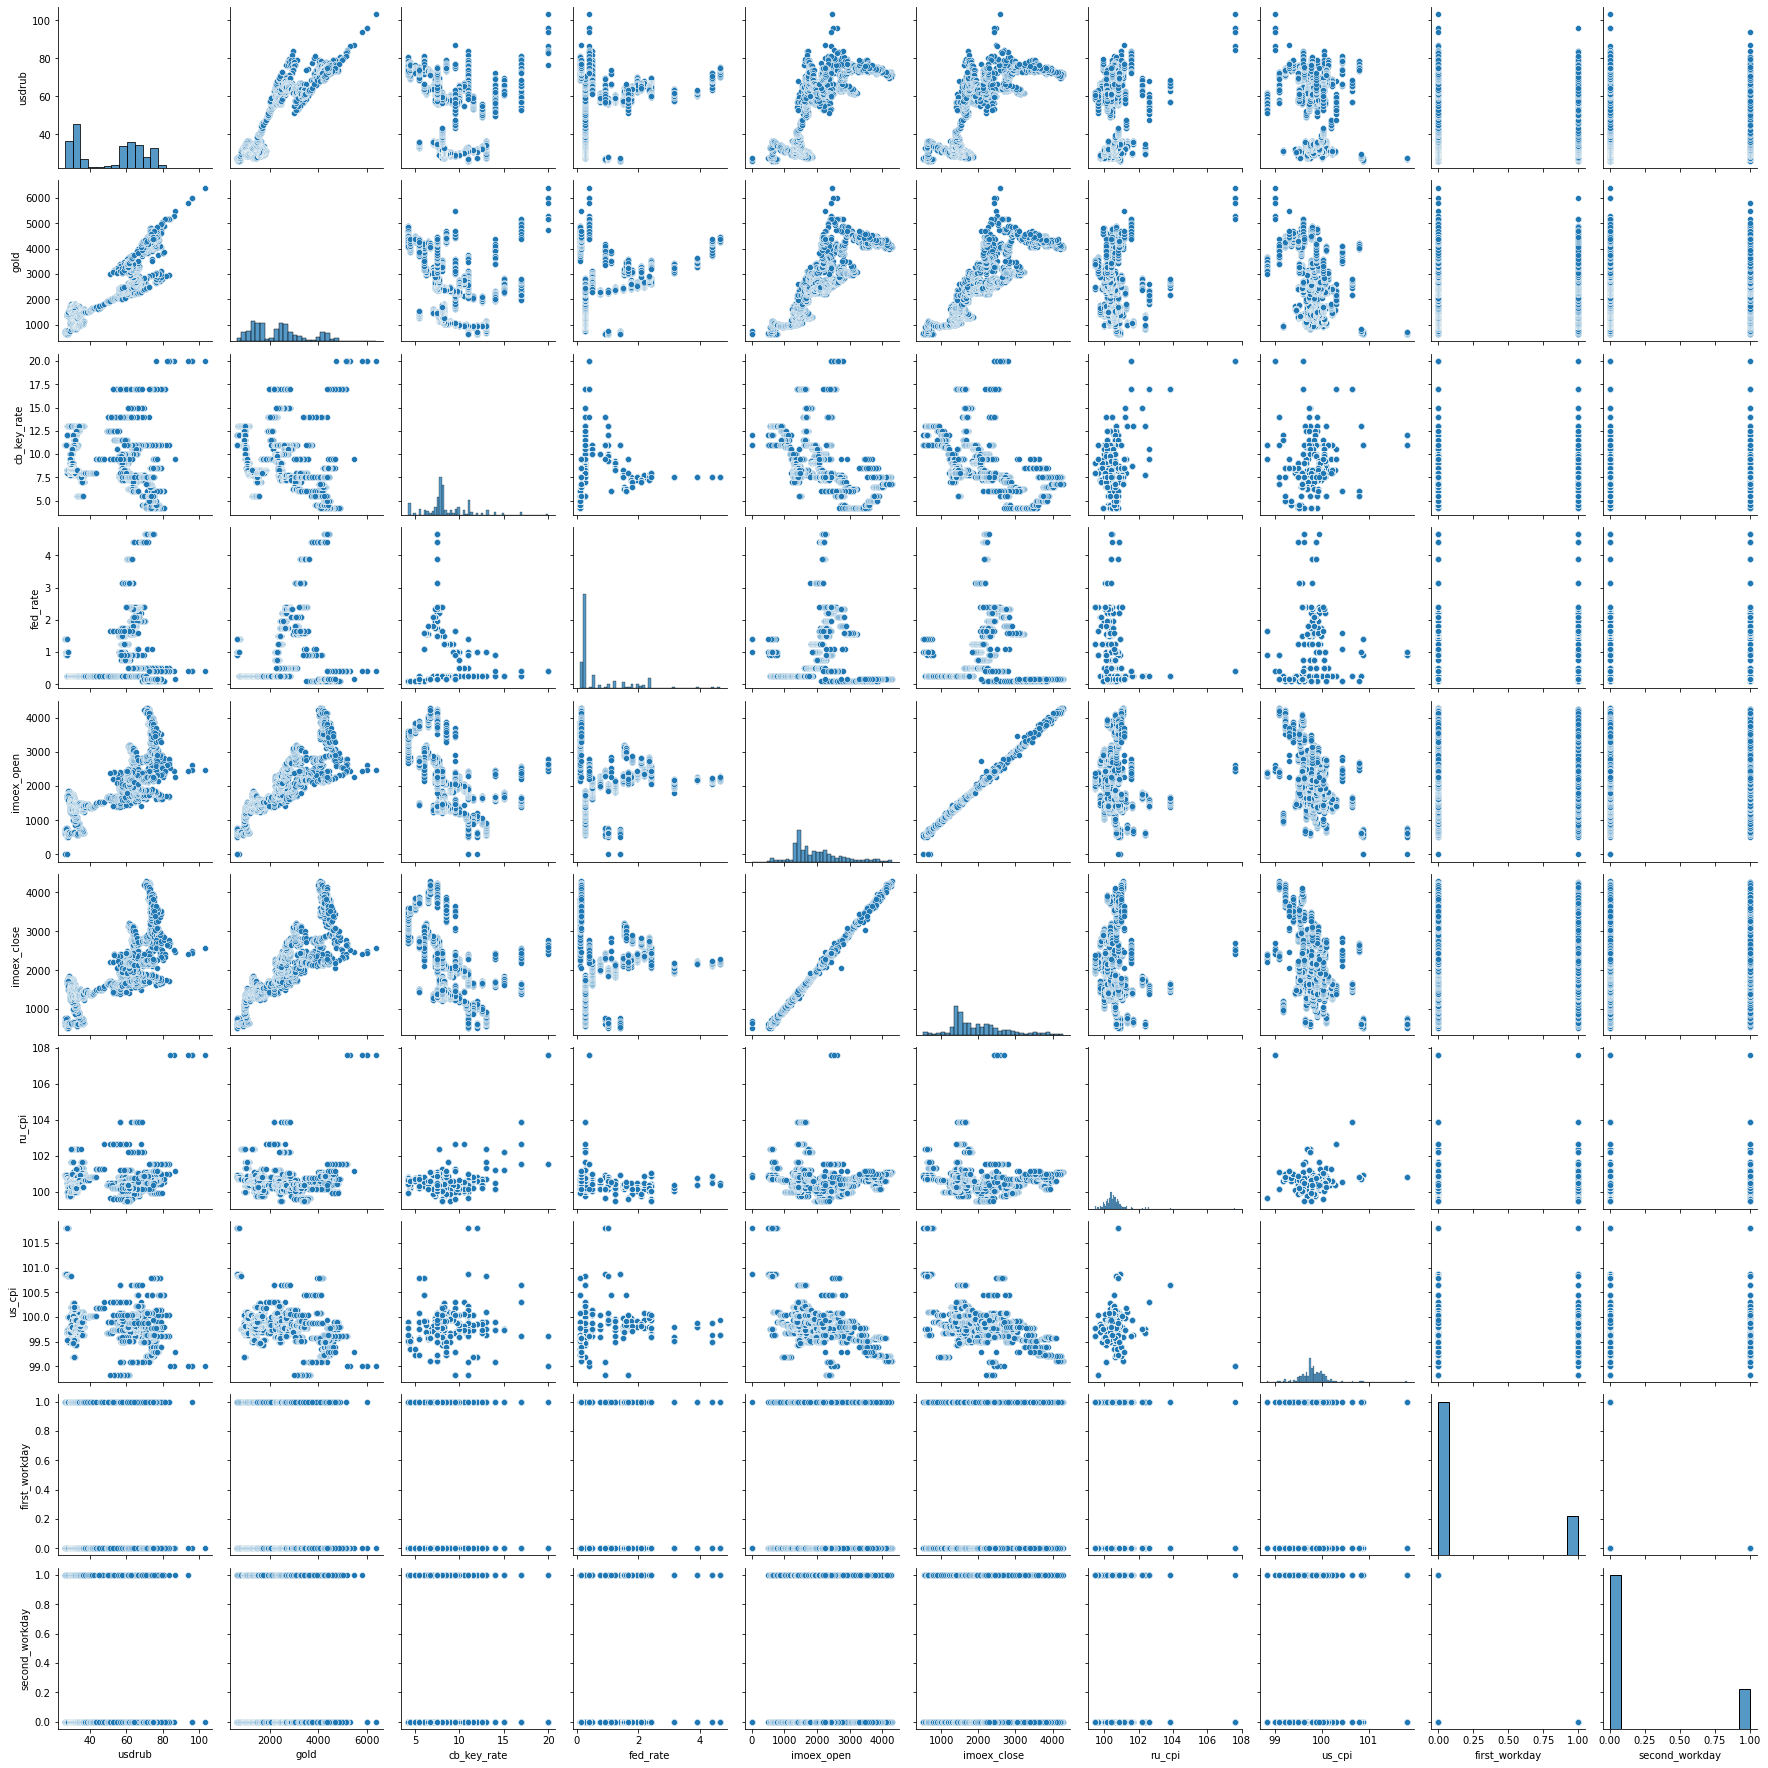

In [3]:
sns.pairplot(df);

Рассмотрев все связи на графиках рассеяния, самую сильную можно увидеть у переменных цены открытия и закрытия IMOEX (что вполне логично).
### Что касается нашей целевой переменной, то выглядит так, будто самая сильная связь у курса доллар/рубль и золота. Стоит это проверить.

In [4]:
df.corr()

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,first_workday,second_workday
usdrub,1.000000,0.901684,-0.128703,0.347139,0.788417,0.789214,0.008999,-0.229352,-0.010135,-0.006680
gold,0.901684,1.000000,-0.324880,0.268689,0.878536,0.878582,-0.008028,-0.362570,-0.010706,-0.007845
cb_key_rate,-0.128703,-0.324880,1.000000,-0.123849,-0.494193,-0.494998,0.401680,0.192116,0.001790,0.004145
fed_rate,0.347139,0.268689,-0.123849,1.000000,0.202072,0.203659,-0.218481,-0.011780,-0.000904,-0.000730
imoex_open,0.788417,0.878536,-0.494193,0.202072,1.000000,0.998931,-0.107074,-0.453852,-0.008901,-0.008200
imoex_close,0.789214,0.878582,-0.494998,0.203659,0.998931,1.000000,-0.106389,-0.450978,-0.009393,-0.008024
ru_cpi,0.008999,-0.008028,0.401680,-0.218481,-0.107074,-0.106389,1.000000,0.118933,-0.004723,-0.006082
us_cpi,-0.229352,-0.362570,0.192116,-0.011780,-0.453852,-0.450978,0.118933,1.000000,-0.011469,-0.011429
first_workday,-0.010135,-0.010706,0.001790,-0.000904,-0.008901,-0.009393,-0.004723,-0.011469,1.000000,-0.257202
second_workday,-0.006680,-0.007845,0.004145,-0.000730,-0.008200,-0.008024,-0.006082,-0.011429,-0.257202,1.000000


### Сделаем табличку покрасивее

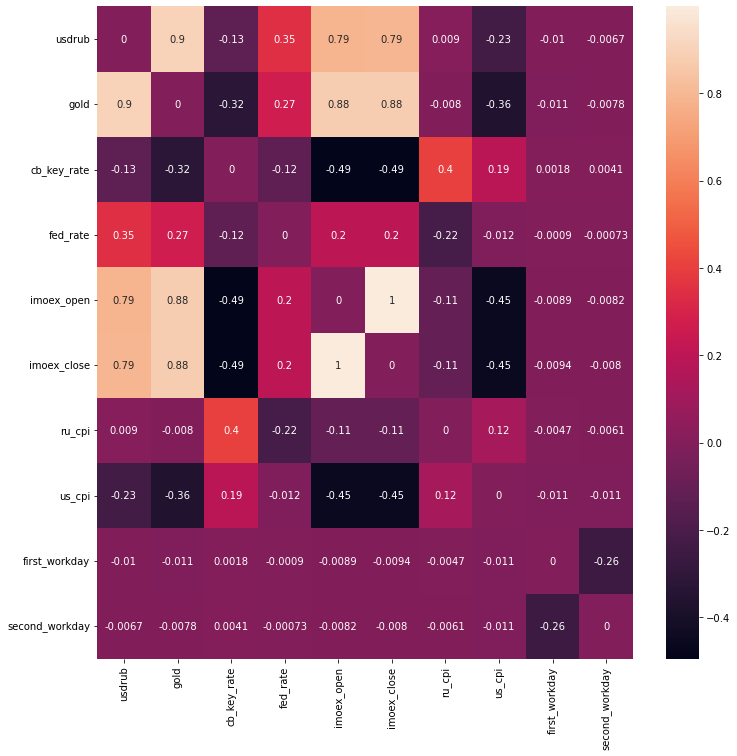

In [5]:
corr_graph = df.corr() - np.eye(len(df.corr()))  # Уберём корреляцию переменных самих с собой, чтобы не отвлекали взгляд

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_graph, annot=True);

Действительно, коэффициент корреляции между курсом доллар/рубль и ценой золота очень высокий, что говорит об их сильной линейной положительной связи. Кроме того из этой таблицы можно увидеть, что довольна высокая корреляция и у курса доллара с ценой IMOEX при открытии и закрытии. 

### Можно поподробнее рассмотреть самую сильную из имеющихся связей

In [10]:
df.iplot(x='usdrub',y='gold',categories='cb_key_rate', xTitle='Курс доллар/рубль',
                  yTitle='Цена на золото')

Видим корреляционную зависимость двух переменных, для красоты точки были раскрашены по ключевой ставке на то время

In [7]:
df['usdrub'].iplot(kind='hist', xTitle='Курс',
                  yTitle='Кол-во дней', title='Распределение курса доллар/рубль');
df['gold'].iplot(kind='hist', xTitle='Цена на золото',
                  yTitle='Кол-во дней', title='Распределение цены на золото');

Такая сильная корреляция возможно из-за того, что и золото и курс валют имеют явно выраженные три интервала времени, когда их "цена" держалась в определённом диапазоне и в схожем друг на друга процентном соотношении от общей картины.
Можно сделать вывод, что именно в этот период происходило ослабление рубля как валюты, из-за чего рос и курс доллара и цена золота.

### Теперь посмотрим подробнее на связь usd/rub и цены IMOEX
Для удобства возьмём только цену открытия(они в любом случае очень похожи)

In [8]:
df.iplot(x='usdrub',y='imoex_open',categories='cb_key_rate', xTitle='Курс доллар/рубль',
                  yTitle='Цена IMOEX')

Тут корреляция менее наглядна, но тем не менее, видно, что точки не просто хаотично рассеяны.(Точки снова покрашены по ключевой ставке)

In [9]:
df['usdrub'].iplot(kind='hist', xTitle='Курс',
                  yTitle='Кол-во дней', title='Распределение курса доллар/рубль');
df['imoex_open'].iplot(kind='hist', xTitle='Цена IMOEX',
                  yTitle='Кол-во дней', title='Распределение цены IMOEX');

Здесь корреляция видимо также существует за счёт выраженных пиков. Логически ее снова можно объяснить обесценением рубля (как следствие: доллар растёт, цена акций падает).